In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('data/source_data/TRAIN.csv')

In [72]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [73]:
df.shape

(188340, 10)

In [95]:
df.describe()

,store_id,holiday,discount,#order,sales
count,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,0.447536,68.205692,42784.327982
std,105.366308,0.338256,0.497241,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,1.000000,82.000000,51909.000000
max,365.000000,1.000000,1.000000,371.000000,247215.000000


In [74]:
df.columns = df.columns.str.lower()
df['discount'] = np.where(df['discount']=='Yes', 1, 0)

In [75]:
df.head()

,id,store_id,store_type,location_type,region_code,date,holiday,discount,#order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52


In [86]:
df_id = df.groupby('store_id').sum('holiday').reset_index()
df_id.head()

,store_id,holiday,discount,#order,sales
0,1,68,236,30508,17904396.24
1,2,68,233,39318,23908273.41
2,3,68,235,59487,32239395.66
3,4,68,233,33477,19856834.16
4,5,68,235,35245,22421598.81


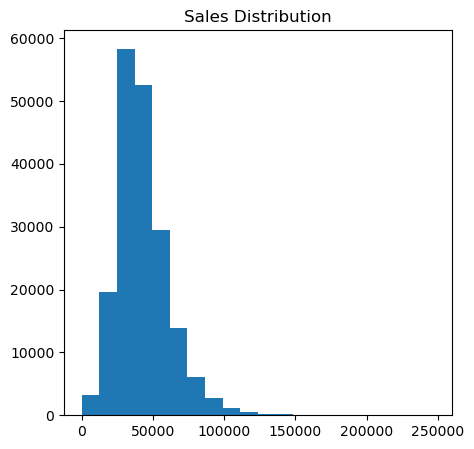

In [93]:

plt.figure(figsize=(5, 5))

plt.hist(df.sales, bins = 20)
plt.title('Sales Distribution');

In [99]:
df_date = df.groupby('date').sum('sales').reset_index()
df_date

,date,store_id,holiday,discount,#order,sales
0,2018-01-01,66795,365,365,19666,15345484.50
1,2018-01-02,66795,0,365,25326,19592415.00
2,2018-01-03,66795,0,365,24047,18652527.00
3,2018-01-04,66795,0,364,25584,19956267.00
4,2018-01-05,66795,0,364,28436,22902651.00
...,...,...,...,...,...,...
511,2019-05-27,66795,0,321,25447,17197023.00
512,2019-05-28,66795,0,319,27184,18652065.00
513,2019-05-29,66795,0,193,24047,16213497.00
514,2019-05-30,66795,0,76,24318,16082139.00


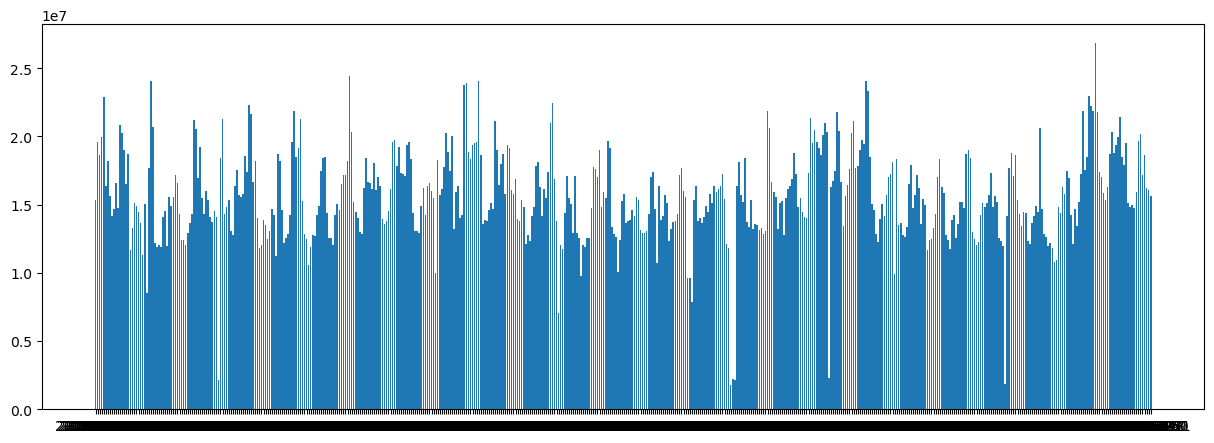

In [100]:
plt.figure(figsize=(15, 5))

plt.bar(x='date', height='sales', data=df_date);

In [78]:
df_type = df.groupby('store_type').mean('sales').reset_index()
df_type.head()

,store_type,store_id,holiday,discount,#order,sales
0,S1,171.715116,0.131783,0.446852,58.022095,37676.511694
1,S2,204.553571,0.131783,0.445425,40.472799,27530.828222
2,S3,167.791667,0.131783,0.449814,73.663396,47063.068209
3,S4,199.449438,0.131783,0.448959,102.392779,59945.685926


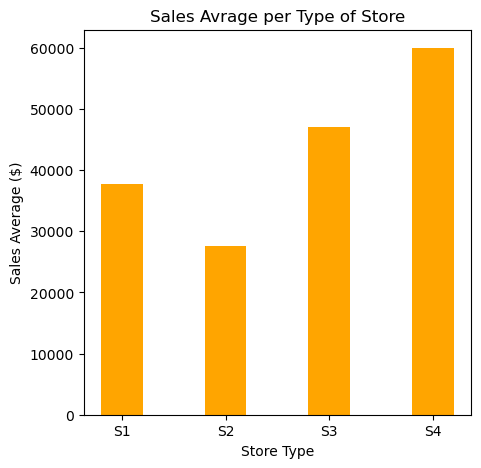

In [79]:
plt.figure(figsize=(5, 5))

plt.bar(x='store_type', height='sales', data=df_type, width=0.4, color= 'orange')
plt.xlabel('Store Type')
plt.ylabel('Sales Average ($)')
plt.title('Sales Avrage per Type of Store');

In [80]:
df_loc = df.groupby('location_type').mean('sales').reset_index()
df_loc.head()

,location_type,store_id,holiday,discount,#order,sales
0,L1,175.812121,0.131783,0.446629,65.265938,41453.597889
1,L2,181.191489,0.131783,0.449097,94.851456,59231.480373
2,L3,194.137931,0.131783,0.448443,53.156943,33072.257756
3,L4,220.476190,0.131783,0.445644,47.386028,29067.414313
4,L5,180.148148,0.131783,0.447172,41.924131,25187.787261


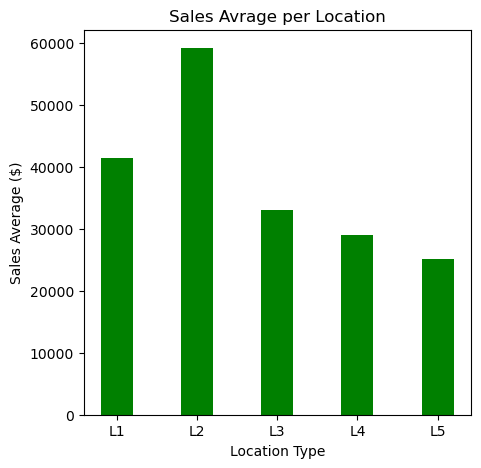

In [81]:
plt.figure(figsize=(5, 5))

plt.bar(x='location_type', height='sales', data=df_loc, width=0.4, color= 'green')
plt.xlabel('Location Type')
plt.ylabel('Sales Average ($)')
plt.title('Sales Avrage per Location');

In [85]:
location_dummies = pd.get_dummies(df['location_type'], prefix = 'location', drop_first=True)

region_dummies = pd.get_dummies(df['region_code'], prefix = 'code', drop_first=True)

store_dummies = pd.get_dummies(df['store_type'], prefix = 'store', drop_first=True)